<a href="https://colab.research.google.com/github/khushimitr/HandGestureRecognition/blob/main/HandGestureRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the data from GDrive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp "/content/drive/MyDrive/machine_learning/finalHandImages.zip" "/content"

In [5]:
!wget "https://raw.githubusercontent.com/khushimitr/HandGestureRecognition/main/helperfunctions.py"

--2022-01-09 12:18:13--  https://raw.githubusercontent.com/khushimitr/HandGestureRecognition/main/helperfunctions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9735 (9.5K) [text/plain]
Saving to: ‘helperfunctions.py’

helperfunctions.py  100%[===================>]   9.51K  --.-KB/s    in 0s      

2022-01-09 12:18:13 (58.3 MB/s) - ‘helperfunctions.py’ saved [9735/9735]



In [6]:
from helperfunctions import unzip_data, walk_through_dir, create_tensorboard_callback, plot_loss_curves,confusion_matrix

In [7]:
!unzip "/content/finalHandImages.zip" -d "/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/handImages/all_classes/train/palm/frame_01_01_0060.png  
  inflating: /content/handImages/all_classes/train/palm/frame_04_01_0050.png  
  inflating: /content/handImages/all_classes/train/palm/frame_06_01_0183.png  
  inflating: /content/handImages/all_classes/train/palm/frame_06_01_0040.png  
  inflating: /content/handImages/all_classes/train/palm/frame_02_01_0008.png  
  inflating: /content/handImages/all_classes/train/palm/frame_06_01_0119.png  
  inflating: /content/handImages/all_classes/train/palm/frame_06_01_0164.png  
  inflating: /content/handImages/all_classes/train/palm/frame_08_01_0113.png  
  inflating: /content/handImages/all_classes/train/palm/frame_07_01_0156.png  
  inflating: /content/handImages/all_classes/train/palm/frame_08_01_0070.png  
  inflating: /content/handImages/all_classes/train/palm/frame_09_01_0111.png  
  inflating: /content/handImages/all_classes/train/palm/frame_02_01_0124.png  
 

## Becoming one with Data

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import zipfile

In [9]:
train_dir = "/content/handImages/all_classes/train/"
test_dir = "/content/handImages/all_classes/test/"

In [10]:
walk_through_dir("/content/handImages/all_classes")

There are 2 directories and 0 images in '/content/handImages/all_classes'.
There are 10 directories and 0 images in '/content/handImages/all_classes/train'.
There are 0 directories and 1600 images in '/content/handImages/all_classes/train/index'.
There are 0 directories and 1600 images in '/content/handImages/all_classes/train/thumb'.
There are 0 directories and 1600 images in '/content/handImages/all_classes/train/fist_moved'.
There are 0 directories and 1600 images in '/content/handImages/all_classes/train/l_shape'.
There are 0 directories and 1600 images in '/content/handImages/all_classes/train/fist'.
There are 0 directories and 1600 images in '/content/handImages/all_classes/train/c_shape'.
There are 0 directories and 1600 images in '/content/handImages/all_classes/train/ok'.
There are 0 directories and 1600 images in '/content/handImages/all_classes/train/down'.
There are 0 directories and 1600 images in '/content/handImages/all_classes/train/palm'.
There are 0 directories and 16

In [55]:
import pathlib

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = list(class_names)
class_names

['c_shape',
 'down',
 'fist',
 'fist_moved',
 'index',
 'l_shape',
 'ok',
 'palm',
 'palm_moved',
 'thumb']

### View 4 Random Images from a single class

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_images(target_dir,target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 4)

    plt.subplot(2,2,1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis(False)

    plt.subplot(2,2,2)
    img = mpimg.imread(target_folder + "/" + random_image[1])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis(False)

    plt.subplot(2,2,3)
    img = mpimg.imread(target_folder + "/" + random_image[2])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis(False)

    plt.subplot(2,2,4)
    img = mpimg.imread(target_folder + "/" + random_image[3])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis(False)

    print(f"Image Shape : {img.shape}")
    return img

Image Shape : (240, 640)


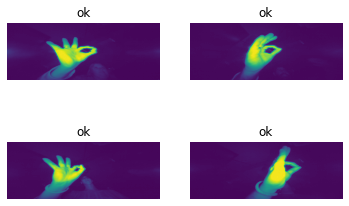

In [13]:
img = view_random_images(train_dir,random.choice(class_names))

In [14]:
img.shape

(240, 640)

In [15]:
img

array([[0.01568628, 0.01568628, 0.01176471, ..., 0.01176471, 0.01568628,
        0.01568628],
       [0.01176471, 0.01568628, 0.01568628, ..., 0.02352941, 0.01176471,
        0.01960784],
       [0.01568628, 0.01176471, 0.01960784, ..., 0.02352941, 0.01960784,
        0.01960784],
       ...,
       [0.00784314, 0.01568628, 0.00784314, ..., 0.01176471, 0.01568628,
        0.01960784],
       [0.00392157, 0.01176471, 0.01568628, ..., 0.01568628, 0.01568628,
        0.02745098],
       [0.01568628, 0.01568628, 0.01568628, ..., 0.09803922, 0.04705882,
        0.0627451 ]], dtype=float32)

## Preprocess the data

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,target_size = IMG_SIZE,color_mode = "grayscale",batch_size = BATCH_SIZE,
                                               class_mode = "categorical", shuffle = True, seed = 42)
test_data = train_datagen.flow_from_directory(test_dir,target_size = IMG_SIZE,color_mode = "grayscale",batch_size = BATCH_SIZE,
                                              class_mode = "categorical",shuffle = False)

Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


In [17]:
train_datagen_augmentated = ImageDataGenerator(rescale = 1/255., 
                                               rotation_range=0.2,
                                               shear_range=0.2,
                                               zoom_range=0.2,
                                               width_shift_range=0.2,
                                               height_shift_range=0.3,
                                               horizontal_flip=True)

train_data_augmented = train_datagen_augmentated.flow_from_directory(train_dir,target_size=IMG_SIZE,color_mode = "grayscale",
                                                                     batch_size=BATCH_SIZE,class_mode="categorical", shuffle = True, seed = 42)

Found 16000 images belonging to 10 classes.


In [18]:
train_data_augmented

In [19]:
images, labels = train_data_augmented.next()
print(images[0].shape, labels[0])

(224, 224, 1) [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Experiments

### 1. Build a CNN Model 

In [22]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

tf.random.set_seed(42)
model_1 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = "relu", input_shape = (224,224,1)),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation = "relu"),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation = "softmax")
])

model_1.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer = Adam(), metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

In [23]:
lr_history = model_1.fit(train_data_augmented,
                        epochs = 20,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps= int(0.15 * len(test_data)),
                        callbacks = [lr_scheduler]
                        )

Epoch 1/20
500/500 [==============================] - 118s 216ms/step - loss: 1.7222 - accuracy: 0.3839 - val_loss: 1.2014 - val_accuracy: 0.6146 - lr: 0.0010
Epoch 2/20
500/500 [==============================] - 109s 218ms/step - loss: 1.0669 - accuracy: 0.6302 - val_loss: 0.8438 - val_accuracy: 0.7014 - lr: 0.0011
Epoch 3/20
500/500 [==============================] - 110s 219ms/step - loss: 0.8310 - accuracy: 0.7070 - val_loss: 0.5282 - val_accuracy: 0.8663 - lr: 0.0013
Epoch 4/20
500/500 [==============================] - 109s 217ms/step - loss: 0.6979 - accuracy: 0.7656 - val_loss: 0.5376 - val_accuracy: 0.8802 - lr: 0.0014
Epoch 5/20
500/500 [==============================] - 109s 218ms/step - loss: 0.5979 - accuracy: 0.7994 - val_loss: 0.4508 - val_accuracy: 0.8385 - lr: 0.0016
Epoch 6/20
500/500 [==============================] - 109s 219ms/step - loss: 0.5051 - accuracy: 0.8347 - val_loss: 0.3748 - val_accuracy: 0.8576 - lr: 0.0018
Epoch 7/20
500/500 [==========================

Text(0.5, 1.0, 'Finding the ideal Learning Rate')

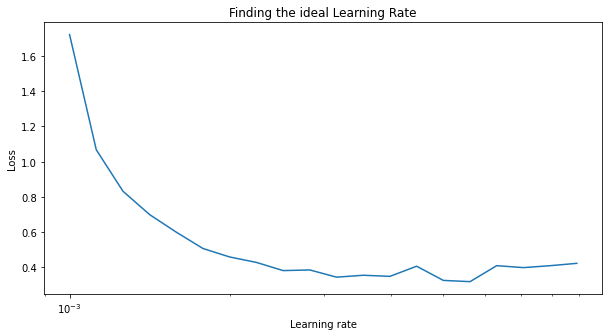

In [24]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
lrs = 1e-3 * (10**(tf.range(20)/20))
plt.semilogx(lrs, lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal Learning Rate")

In [25]:
model_1.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer = Adam(0.004), metrics = ["accuracy"])
history_1 = model_1.fit(
    train_data_augmented,
    epochs = 5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps= int(0.15 * len(test_data)),
    callbacks = [create_tensorboard_callback("CALLBACKS", "model_1")]
)

Saving TensorBoard log files to: CALLBACKS/model_1/20220109-125842
Epoch 1/5
500/500 [==============================] - 110s 218ms/step - loss: 0.2584 - accuracy: 0.9200 - val_loss: 0.1781 - val_accuracy: 0.9444
Epoch 2/5
500/500 [==============================] - 110s 219ms/step - loss: 0.2135 - accuracy: 0.9357 - val_loss: 0.1616 - val_accuracy: 0.9514
Epoch 3/5
500/500 [==============================] - 110s 219ms/step - loss: 0.2018 - accuracy: 0.9389 - val_loss: 0.1832 - val_accuracy: 0.9618
Epoch 4/5
500/500 [==============================] - 110s 219ms/step - loss: 0.1616 - accuracy: 0.9499 - val_loss: 0.1163 - val_accuracy: 0.9635
Epoch 5/5
500/500 [==============================] - 110s 219ms/step - loss: 0.1737 - accuracy: 0.9477 - val_loss: 0.0888 - val_accuracy: 0.9670


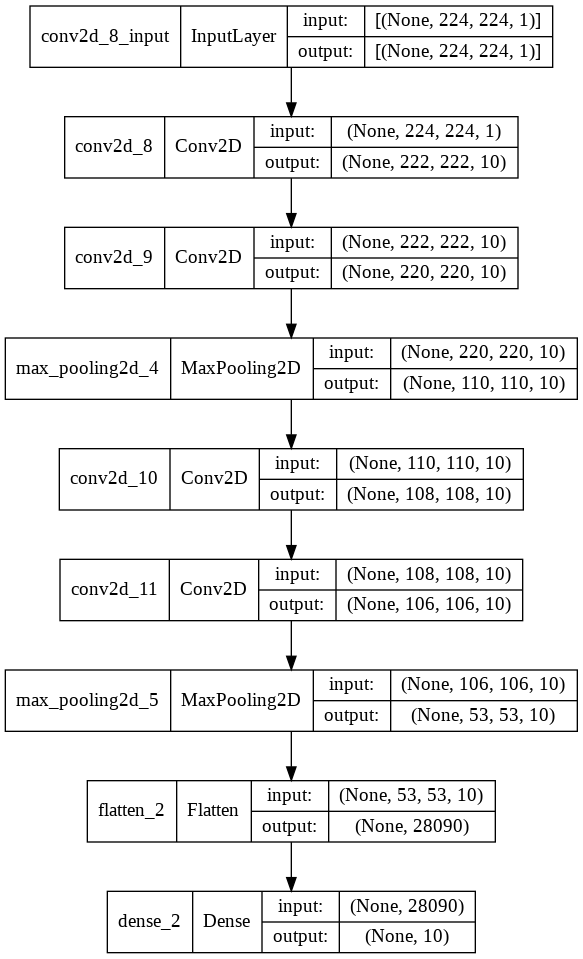

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model = model_1,show_shapes = True)

## Plotting the Loss Curves

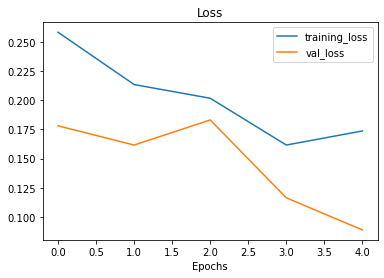

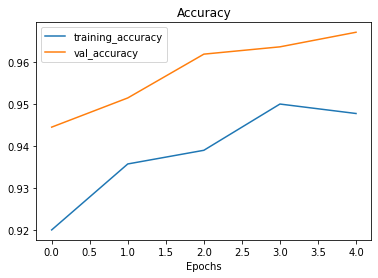

In [27]:
plot_loss_curves(history_1)

## Evaluate the Model

In [28]:
model_1.evaluate(test_data)

125/125 [==============================] - 10s 79ms/step - loss: 0.0560 - accuracy: 0.9815


[0.05601140856742859, 0.9815000295639038]

In [29]:
pred_probs = model_1.predict(test_data, verbose=1)

125/125 [==============================] - 10s 77ms/step


In [30]:
pred_probs.shape
pred_probs[1]

array([9.9668878e-01, 3.2142866e-03, 9.1527057e-13, 5.2618708e-07,
       6.2546537e-09, 9.2803304e-05, 3.5973521e-06, 8.0164991e-10,
       6.3804360e-13, 8.1710958e-08], dtype=float32)

In [31]:
pred_classes = pred_probs.argmax(axis = 1)
pred_classes[87]

0

In [59]:
labels = test_data.labels
labels[87]

0

## Checking Results on Custom Test Data

In [56]:
import cv2
def load_and_prep_img(filename, image_shape = 224,scale = True,chn = 3):
    # Read in the image
    img = tf.io.read_file(filename)

    img = tf.image.decode_image(img, channels = chn)
    
    #Resize the image
    img = tf.image.resize(img,size=[image_shape,image_shape])

    #Rescale the image
    if scale:
        return img/255.
    else:
        return img

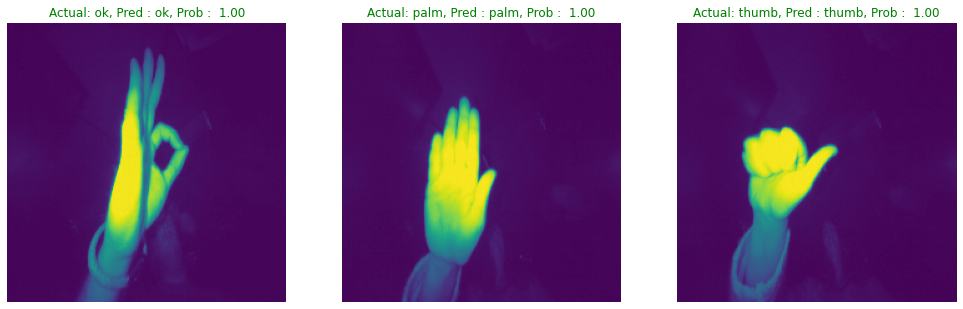

In [57]:
import random
import os

plt.figure(figsize = (17,10))
for i in range(3):
    class_name = random.choice(class_names)
    filename = random.choice(os.listdir(test_dir + class_name))
    filepath =  test_dir + class_name + "/" + filename

    img = load_and_prep_img(filename=filepath,chn = 1)
    pred_prob = model_1.predict(tf.expand_dims(img,axis = 0))
    pred_class = class_names[pred_prob.argmax()]

    plt.subplot(1,3,i+1)
    plt.imshow(tf.squeeze(img))
    if class_name == pred_class:
        title_color = "g"
    else:
        title_color = "r"
    plt.title(f"Actual: {class_name}, Pred : {pred_class}, Prob : {pred_prob.max(): .2f}", c = title_color)
    plt.axis(False)

## Loading and Saving the model

In [35]:
model_1.save("/content/drive/MyDrive/machine_learning/handRecognitionModel")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/machine_learning/handRecognitionModel/assets


In [36]:
loaded_model_1 = tf.keras.models.load_model("/content/drive/MyDrive/machine_learning/handRecognitionModel")

In [37]:
# Evaluate loaded model
loaded_model_results= loaded_model_1.evaluate(test_data)

125/125 [==============================] - 10s 79ms/step - loss: 0.0560 - accuracy: 0.9815


In [40]:
loaded_model_results

[0.05601140856742859, 0.9815000295639038]

## Confusion Matrix and Classification Report

In [60]:
labels.shape,pred_classes.shape

((4000,), (4000,))

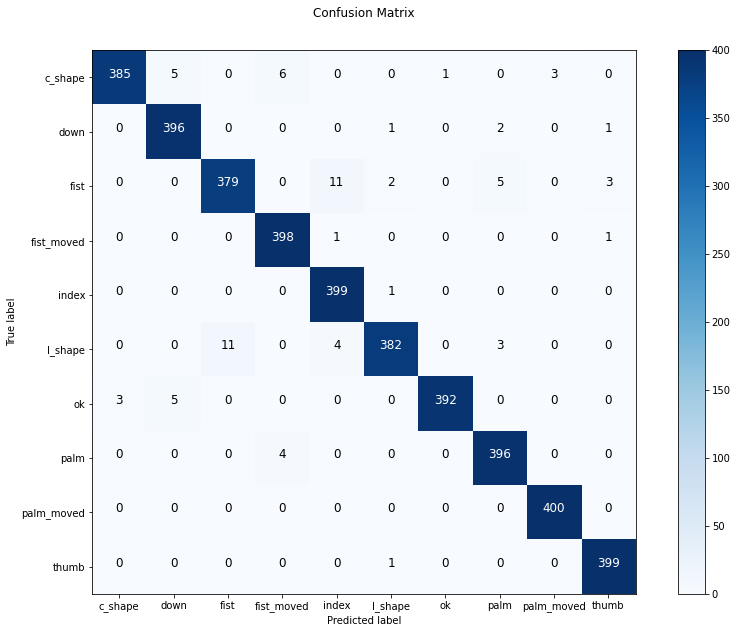

In [65]:
from helperfunctions import make_confusion_matrix
make_confusion_matrix(y_true=labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize = (15,10),
                      text_size = 12)

In [66]:
from sklearn.metrics import classification_report

classification_report_dict = classification_report(labels,pred_classes, output_dict=True)
print(classification_report_dict)

f1_scores = {}
for k, v in classification_report_dict.items():
    if k == "accuracy":
        break
    else:
        f1_scores[class_names[int(k)]] = v["f1-score"]

print(f1_scores)

f1_scores_df = pd.DataFrame({"class_names" : list(f1_scores.keys()),
                            "f1_score" : list(f1_scores.values())}).sort_values("f1_score", ascending =False)

f1_scores_df.head(10)

{'0': {'precision': 0.9922680412371134, 'recall': 0.9625, 'f1-score': 0.9771573604060914, 'support': 400}, '1': {'precision': 0.9753694581280788, 'recall': 0.99, 'f1-score': 0.9826302729528535, 'support': 400}, '2': {'precision': 0.9717948717948718, 'recall': 0.9475, 'f1-score': 0.959493670886076, 'support': 400}, '3': {'precision': 0.9754901960784313, 'recall': 0.995, 'f1-score': 0.9851485148514851, 'support': 400}, '4': {'precision': 0.9614457831325302, 'recall': 0.9975, 'f1-score': 0.9791411042944784, 'support': 400}, '5': {'precision': 0.9870801033591732, 'recall': 0.955, 'f1-score': 0.9707750952986023, 'support': 400}, '6': {'precision': 0.9974554707379135, 'recall': 0.98, 'f1-score': 0.9886506935687264, 'support': 400}, '7': {'precision': 0.9753694581280788, 'recall': 0.99, 'f1-score': 0.9826302729528535, 'support': 400}, '8': {'precision': 0.9925558312655087, 'recall': 1.0, 'f1-score': 0.9962640099626401, 'support': 400}, '9': {'precision': 0.9876237623762376, 'recall': 0.9975, 

,class_names,f1_score
8,palm_moved,0.996264
9,thumb,0.992537
6,ok,0.988651
3,fist_moved,0.985149
1,down,0.982630
7,palm,0.982630
4,index,0.979141
0,c_shape,0.977157
5,l_shape,0.970775
2,fist,0.959494


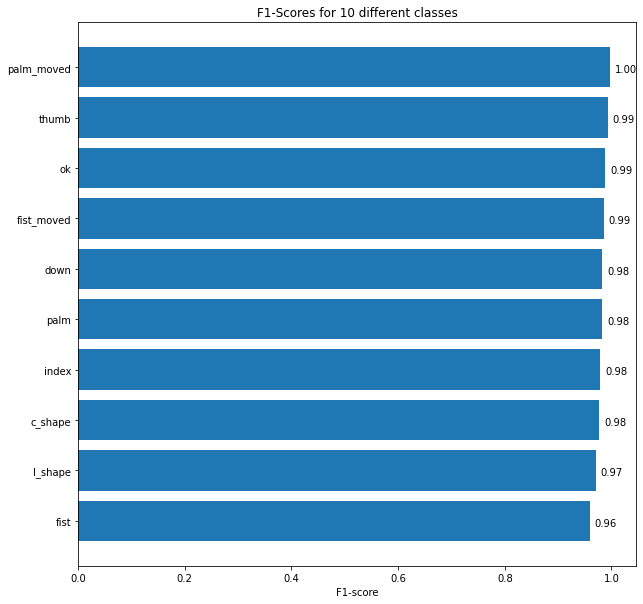

In [72]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
scores = ax.barh(range(len(f1_scores_df)), f1_scores_df["f1_score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores_df["class_names"])
ax.set_title("F1-Scores for 10 different classes")
ax.set_xlabel("F1-score")
ax.invert_yaxis()

def autolabel(rects):
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

## Test on Custom Images

In [ ]:
def pred_and_plot(model,filename,class_names = class_names):
    img = handleBackground(path=filename)
    pred = model.predict(tf.expand_dims(img,axis = 0))
    pred_class = class_names[pred_prob.argmax()]
    plt.imshow(tf.squeeze(img))
    plt.title(f"Prediction : {pred_class}")
    plt.axis(False)